In [3]:
import cv2 
import json
import torch 
from matplotlib import image
from matplotlib import pyplot as plt
import random
import tkinter as tk

In [4]:
train_json_path =  "coco2017/annotations/instances_train2017.json"

In [5]:
train_json_dataset = json.load(open(train_json_path,"r"))

In [6]:
train_json_dataset.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [12]:
train_json_dataset['images'][0]['id']

391895

In [23]:
image_converter = {}
for i in train_json_dataset['images']:
    image_converter.update({i['id']:i['file_name']}) 

In [26]:
train_json_dataset['categories']

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [41]:
categories = {}
for idx,j in enumerate(train_json_dataset["categories"]):
    # categories[train_json_dataset["categories"][idx]['id']] = j['name']
    categories.update({train_json_dataset['categories'][idx]['id']:j['name']})
categories

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

In [46]:
train_json_dataset['annotations'][0]

{'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]],
 'area': 2765.1486500000005,
 'iscrowd': 0,
 'image_id': 558840,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156}

In [ ]:
# x = []
# for i in range(5):
#     x.append({'age':i})
# x

[{'age': 0}, {'age': 1}, {'age': 2}, {'age': 3}, {'age': 4}]

In [53]:
label_info = []

for idx,sample in enumerate(train_json_dataset['annotations']):
    label_info.append({
        "Annotations":idx,
        "image_id":sample['image_id'],
        "file_name":image_converter[sample['image_id']],
        "bbox":sample['bbox'],
        "category_id":sample['category_id'],
        "category":categories[sample['category_id']]
    })

In [55]:
label_info

[{'Annotations': 0,
  'image_id': 558840,
  'file_name': '000000558840.jpg',
  'bbox': [199.84, 200.46, 77.71, 70.88],
  'category_id': 58,
  'category': 'hot dog'},
 {'Annotations': 1,
  'image_id': 200365,
  'file_name': '000000200365.jpg',
  'bbox': [234.22, 317.11, 149.39, 38.55],
  'category_id': 58,
  'category': 'hot dog'},
 {'Annotations': 2,
  'image_id': 200365,
  'file_name': '000000200365.jpg',
  'bbox': [239.48, 347.87, 160.0, 57.81],
  'category_id': 58,
  'category': 'hot dog'},
 {'Annotations': 3,
  'image_id': 200365,
  'file_name': '000000200365.jpg',
  'bbox': [296.65, 388.33, 1.03, 0.0],
  'category_id': 58,
  'category': 'hot dog'},
 {'Annotations': 4,
  'image_id': 200365,
  'file_name': '000000200365.jpg',
  'bbox': [251.87, 333.42, 125.94, 22.71],
  'category_id': 58,
  'category': 'hot dog'},
 {'Annotations': 5,
  'image_id': 495357,
  'file_name': '000000495357.jpg',
  'bbox': [337.02, 244.46, 66.47, 66.75],
  'category_id': 18,
  'category': 'dog'},
 {'Annota

In [56]:
!nvidia-smi

NVIDIA-SMI has failed because you are not:
	a) running as an administrator or
	b) there is not at least one TCC device in the system



In [4]:
YOLOv5s_model = torch.hub.load("ultralytics/yolov5", "yolov5s")

Using cache found in C:\Users\junmi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-11-6 Python-3.10.9 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [5]:
YOLOv5s_model.eval()

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
# def predict_image(img_path):
#     img = plt.imread(img_path)
#     results = YOLOv5s_model(img)
    

In [47]:
img_path = "testing1.jpg"
img = plt.imread(img_path)
results = YOLOv5s_model(img)
results.pandas().xyxy[0]

C:\Users\junmi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


,xmin,ymin,xmax,ymax,confidence,class,name
0,178.100632,259.886932,347.979065,385.762878,0.777723,13,bench
1,248.357925,255.220428,367.369446,367.871368,0.573868,13,bench
2,571.275146,97.379868,600.596069,131.914474,0.544133,0,person


In [ ]:
import numpy as np
import random
%matplotlib inline

def visualize_result(img_path):
    img = plt.imread(img_path)
    result = YOLOv5s_model(img)
    
    df = result.pandas().xyxy[0]
    object_num = df.shape[0]
    fig,ax = plt.subplots()
    plt.imshow(img)
    
    for i in range(object_num):  
        
        plt.title(f"Result {i}")
        color = (random.random(),random.random(),random.random())
        
        x = df.iloc[i]['xmin']
        y = df.iloc[i]['ymin']
        x_length = df.iloc[i]['xmax'] - df.iloc[i]['xmin']
        y_length = df.iloc[i]['ymax'] - df.iloc[i]['ymin']
        
        label = df.iloc[i]['name']
        confidence = df.iloc[i]['confidence']
        
        ax.add_patch(plt.Rectangle((x,y), x_length,y_length, fill=False, edgecolor=(color),linewidth=3))
        ax.text(x, y - 10, f"{label} {round(confidence,2)}", color='white', fontsize=11, weight='bold', backgroundcolor=color)
        
    plt.show()

C:\Users\junmi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


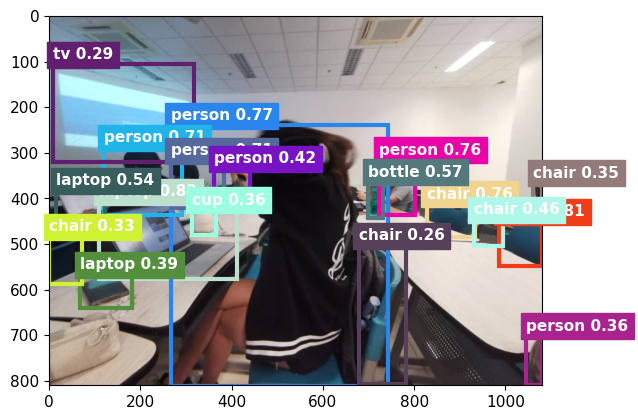

C:\Users\junmi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


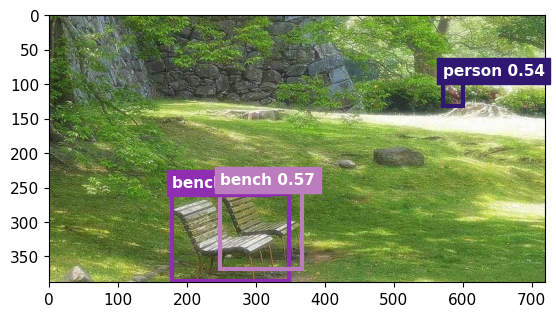

C:\Users\junmi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


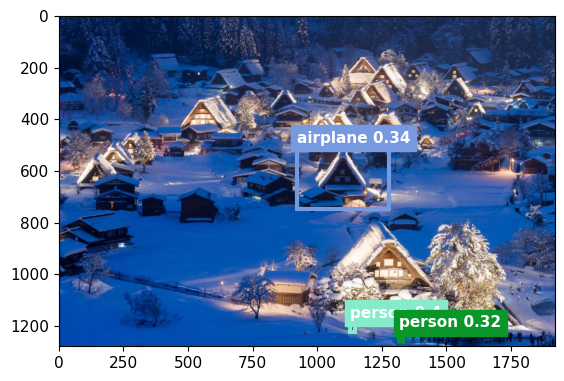

In [70]:
img_path = ["testing2.jpg","testing1.jpg","testing3.webp"]
for i in img_path:
    visualize_result(i)

In [ ]:
# video_path = None

# vid = cv2.VideoCapture(video_path)
# if(vid.isOpened() == False):
#     print("Cannot open video")
    
# while(vid.isOpened()):
#     ret, frame = vid.read()
#     if ret == True:
    